In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pl
from sklearn.metrics import accuracy_score, f1_score


In [2]:
dataset = pd.read_csv("tic-tac-toe.csv")
dataset.head()

,id,'top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square','bottom-left-square','bottom-middle-square','bottom-right-square','Class'
0,1,x,x,x,x,o,o,x,o,o,positive
1,2,x,x,x,x,o,o,o,x,o,positive
2,3,x,x,x,x,o,o,o,o,x,positive
3,4,x,x,x,x,o,o,o,b,b,positive
4,5,x,x,x,x,o,o,b,o,b,positive


In [3]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
print(dataset.columns)
dataset['\'Class\''] = labelEncoder.fit_transform(dataset['\'Class\''])
dataset['\'Class\''].unique()

le = LabelEncoder()
for col in dataset.columns:
    dataset[col] = le.fit_transform(dataset[col])

X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

Index(['id', ''top-left-square'', ''top-middle-square'', ''top-right-square'',
       ''middle-left-square'', ''middle-middle-square'',
       ''middle-right-square'', ''bottom-left-square'',
       ''bottom-middle-square'', ''bottom-right-square'', ''Class''],
      dtype='object')


In [4]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=42)
Y = gm.fit(X).predict(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (766, 10)
Shape of y_train:  (766,)
shape of x_test:  (192, 10)
shape of y_test:  (192,)


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

In [7]:
from sklearn.neural_network import MLPClassifier

bp_results_iterations = []

for i in range(1, 1000, 100):
  mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=i)
  mlp.fit(X_train, y_train)

  y_train_pred = mlp.predict(X_train)
  y_test_pred = mlp.predict(X_test)

  y_train_accuracy = accuracy_score(y_train, y_train_pred)

  y_test_pred = mlp.predict(scaled_X_test)
  y_test_accuracy = accuracy_score(y_test, y_test_pred)
  bp_results_iterations.append([i, "back propogation", y_train_accuracy, y_test_accuracy])


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (301) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.

<Axes: xlabel='Iterations', ylabel='Test Accuracy'>

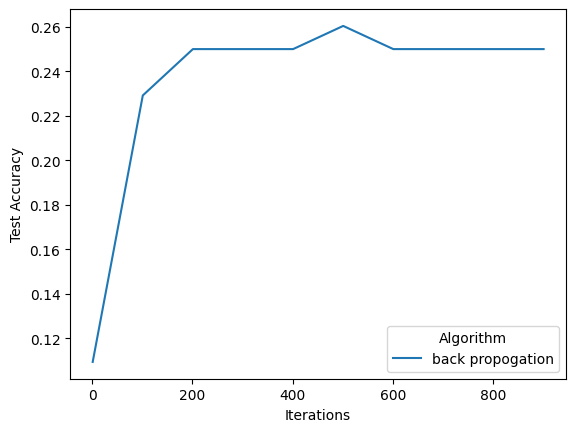

In [8]:
import seaborn as sns
df = pd.DataFrame(bp_results_iterations, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy"])
sns.lineplot(data=df, x="Iterations", y="Test Accuracy", hue="Algorithm")


<Axes: xlabel='Iterations', ylabel='Train Accuracy'>

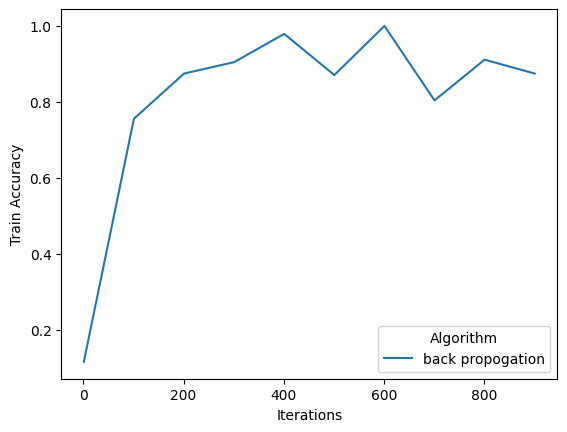

In [9]:
sns.lineplot(data=df, x="Iterations", y="Train Accuracy", hue="Algorithm")


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=1000)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = mlp.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy",y_train_accuracy)
print("Test accuracy",y_test_accuracy)


In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(4,4), max_iter=4000)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = mlp.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy",y_train_accuracy)
print("Test accuracy",y_test_accuracy)

Train accuracy 0.8067885117493473
Test accuracy 0.2604166666666667


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(1,1), max_iter=4000)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = mlp.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy",y_train_accuracy)
print("Test accuracy",y_test_accuracy)

Train accuracy 0.6240208877284595
Test accuracy 0.5104166666666666


In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=4000)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = mlp.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy",y_train_accuracy)
print("Test accuracy",y_test_accuracy)

Train accuracy 0.7924281984334204
Test accuracy 0.25


In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=4000,activation="tanh")
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = mlp.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy",y_train_accuracy)
print("Test accuracy",y_test_accuracy)

Train accuracy 0.891644908616188
Test accuracy 0.4166666666666667


In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=4000,activation="logistic")
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

y_train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = mlp.predict(scaled_X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy",y_train_accuracy)
print("Test accuracy",y_test_accuracy)

Train accuracy 1.0
Test accuracy 0.40625
